# Работа с акселерометром

Акселерометр - это прибор измеряющий проекцию кажущегося ускорения.  
Гироскоп (в рамках данной ЛР) - это прибор измеряющий проекцию угловой скорости.

В рамках данной лабораторной работы мы с вами познакомимся с этими приборами с точки зрения пользователей. И сделаем несколько записей на реальных устройствах.  
В вашем мобильном телефоне (сейчас уже практически в любом) есть набор датчиков: блок акселерометров, блок гироскопов и магнитометр. Поэтому в рамках лабораторной работы мы будем пользоваться вашим телефоном.  
Для записей воспользуемся приложением:  
https://play.google.com/store/apps/details?id=com.kelvin.sensorapp&hl=en&gl=US  
Для Apple:  
https://apps.apple.com/us/app/physics-toolbox-sensor-suite/id1128914250

В следующей ячейке написана функция для чтения файлов записей. Используйте ее для считывания файлов.

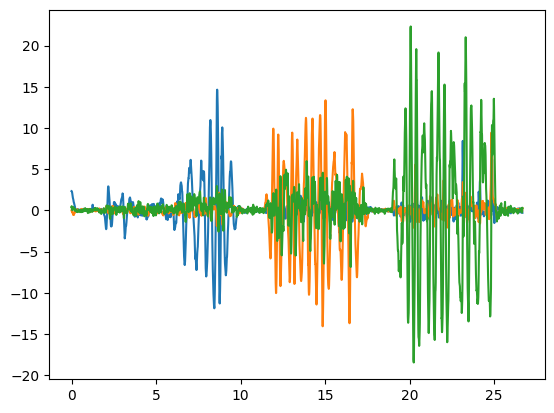

In [25]:

from matplotlib import pyplot
import csv
import math
from scipy.integrate import cumtrapz, simpson
import numpy as np


def read_csv(fname):
    time = []
    x = []
    y = []
    z = []
    init = False
    t0 = 0
    with open(fname, newline = '') as csvfile:
        datareader = csv.reader(csvfile)
        for row in datareader:
            if (len(row)>=4):
                if init:
                    if t0 == 0:
                        t0 = float(row[0])
                    time.append((float(row[0])-t0)/10e8)
                    z.append(float(row[2]))
                    y.append(float(row[3]))
                    x.append(float(row[4]))
                else:
                    init=True
    return time, x, y, z

t, x, y, z = read_csv('data1.csv')
pyplot.plot(t,x,t,y,t,z)
# pyplot.plot(t,y)
# pyplot.plot(t,z)

Сделайте запись акселерометра в которой по каждой оси блока акселерометров по очереди будет воздействовать ускорение, постройте график полученной записи.  

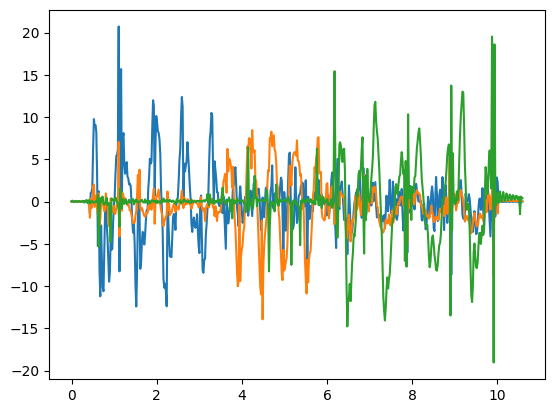

In [24]:
t, x, y, z = read_csv('Accelerometer.csv')
pyplot.plot(t,x,t,y,t,z)

На основе сделанной записи обозначте направление осей блока акселерометров на данном рисунке:  
  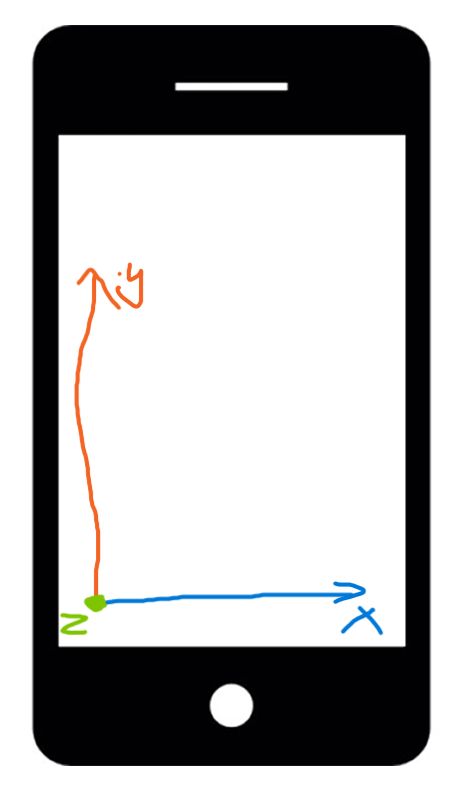


Сделайте запись данных акселерометра согласно рисунку:  
  
<img src="2Перемещение.png">  
  
Обратите внимание начальная и конечная точки движения одинаковые. Однако в среденей точке маршрута телефон так же нужно положить. Постарайтесь что бы при перемещении в горизонтальной плоскости все ускорение проецировалось только на одну ось.  
Постройте график записи получившихся ускорений.

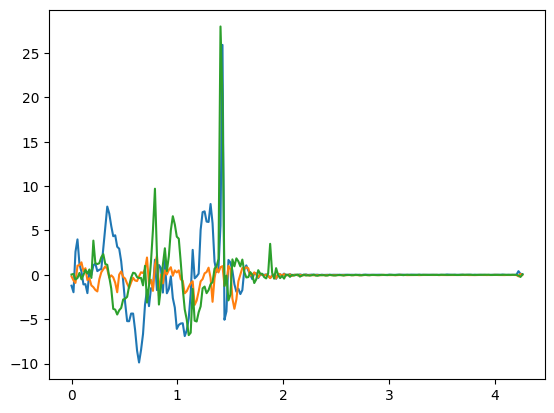

In [29]:
t, x, y, z = read_csv('Accelerometer(1).csv')
pyplot.plot(t,x,t,y,t,z)

Возьмите двойной интеграл ускорения по половине записи по оси по которой были наибольшие всплески ускорений. Возьмите двойной интеграл ускорения по полной записи с той же оси.  
Выведите результаты интегрирования.  
Постройте графики получившейся скорости и перемещения.

C:\Users\Catma\AppData\Local\Temp\ipykernel_20468\2852024901.py:2: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  velocity = cumtrapz(acceleration, time, initial=0)
C:\Users\Catma\AppData\Local\Temp\ipykernel_20468\2852024901.py:4: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  displacement = cumtrapz(velocity, time, initial=0)


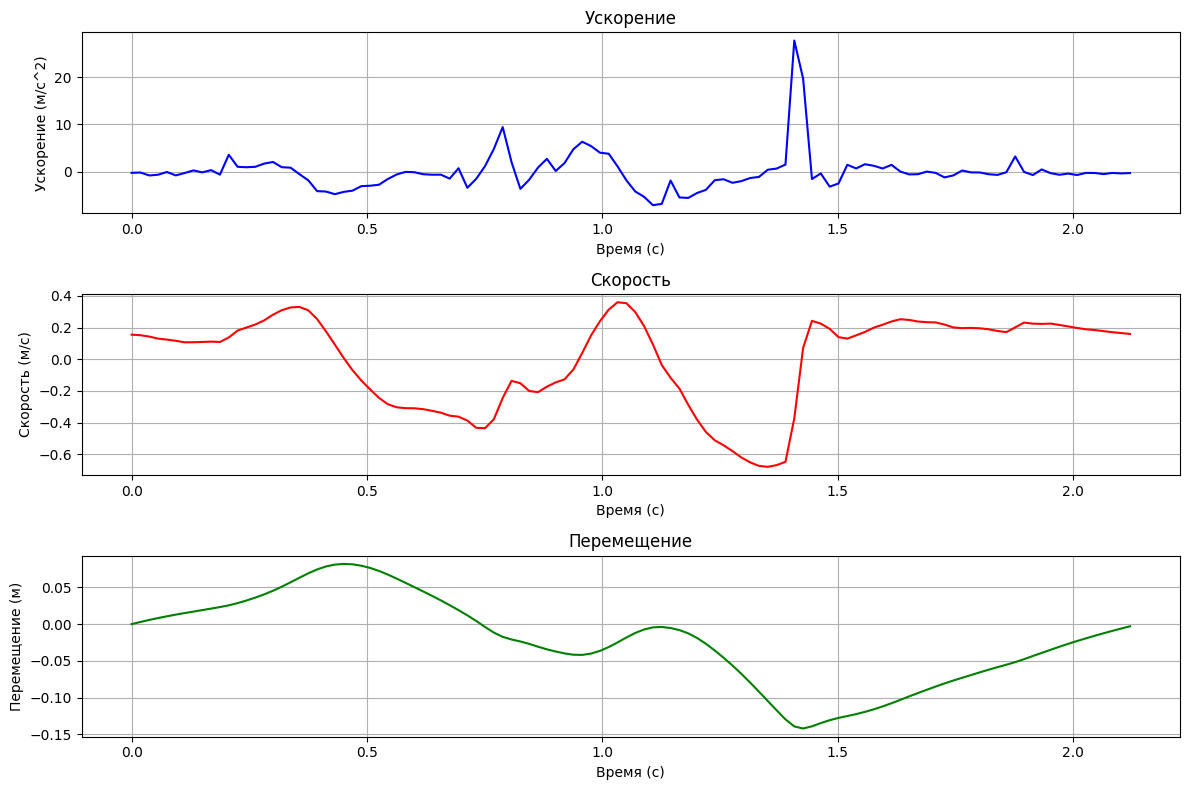

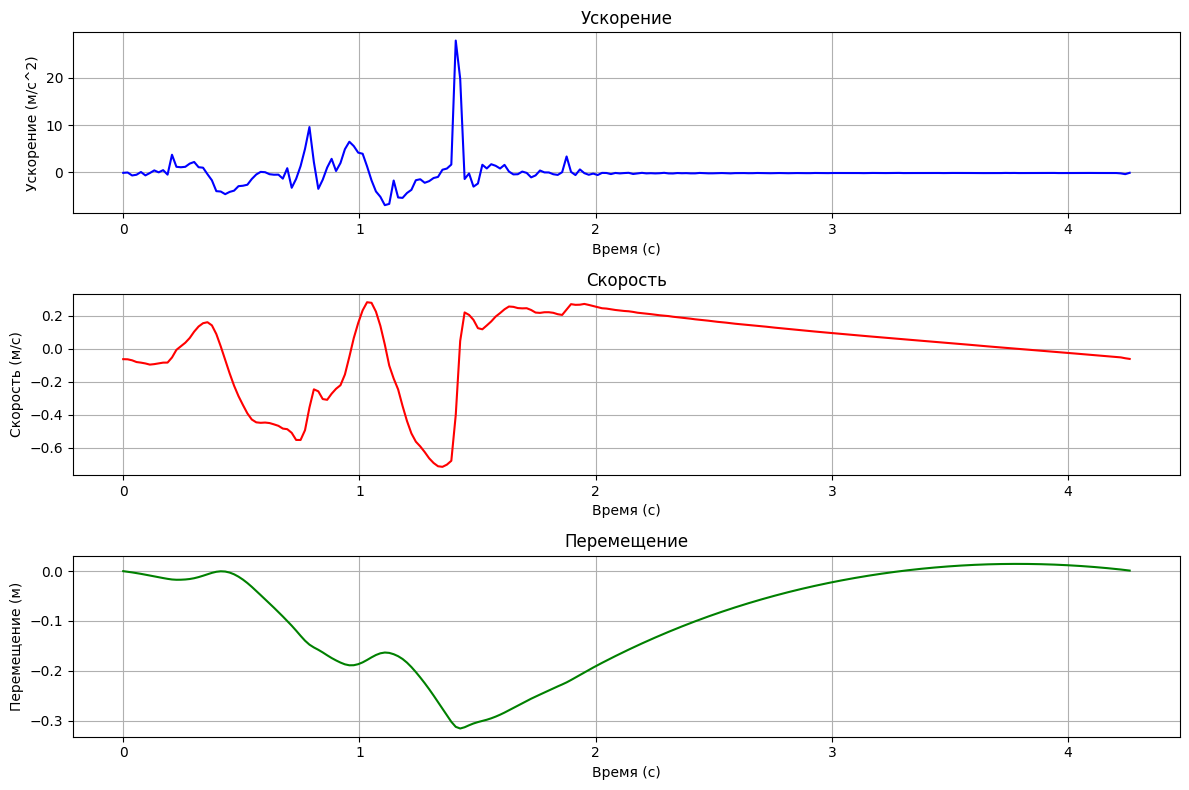

In [6]:
def integrate_acceleration(time, acceleration):
    velocity = cumtrapz(acceleration, time, initial=0)
    velocity -= np.mean(velocity)
    displacement = cumtrapz(velocity, time, initial=0)
    return velocity, displacement

def plot_results(time, acceleration, velocity, displacement, axis_label):
    pyplot.figure(figsize=(12, 8))
    pyplot.subplot(3, 1, 1)
    pyplot.plot(time, acceleration, color='b')
    pyplot.title('Ускорение')
    pyplot.xlabel('Время (с)')
    pyplot.ylabel('Ускорение (м/с^2)')
    pyplot.grid(True)
    pyplot.subplot(3, 1, 2)
    pyplot.plot(time, velocity, color='r')
    pyplot.title('Скорость')
    pyplot.xlabel('Время (с)')
    pyplot.ylabel('Скорость (м/с)')
    pyplot.grid(True)
    pyplot.subplot(3, 1, 3)
    pyplot.plot(time, displacement, color='g')
    pyplot.title('Перемещение')
    pyplot.xlabel('Время (с)')
    pyplot.ylabel('Перемещение (м)')
    pyplot.grid(True)
    pyplot.tight_layout()
    pyplot.show()

def read_csv(fname):
    time = []
    x = []
    y = []
    z = []
    init = False
    t0 = 0
    with open(fname, newline = '') as csvfile:
        datareader = csv.reader(csvfile)
        for row in datareader:
            if (len(row)>=4):
                if init:
                    if t0 == 0:
                        t0 = float(row[0])
                    time.append((float(row[0])-t0)/10e8)
                    z.append(float(row[2]))
                    y.append(float(row[3]))
                    x.append(float(row[4]))
                else:
                    init=True
    return time, x, y, z

time, x, y, z = read_csv('Accelerometer(1).csv')
max_acceleration_axis = np.argmax([max(x), max(y), max(z)])
half_index = len(time) // 2
axis_data = [x, y, z][max_acceleration_axis]
acceleration_half = axis_data[:half_index]
acceleration_half -= np.mean(acceleration_half)
axis_data -= np.mean(axis_data)
time_half = time[:half_index]
velocity_half, displacement_half = integrate_acceleration(time_half, acceleration_half)
velocity_full, displacement_full = integrate_acceleration(time, axis_data)
plot_results(time_half, acceleration_half, velocity_half, displacement_half, f"Axis {max_acceleration_axis} (Half Data)")
plot_results(time, axis_data, velocity_full, displacement_full, f"Axis {max_acceleration_axis} (Full Data)")



Опишите что получилось и почему.

*\*Задание повышенной сложности (не обязательное)*  
При помощи акселерометра сделайте запись по которой можно будет восстановить задуманный вами рисунок (начните с простого варианта квадрат/треугольник).

In [ ]:
В процессе лабораторной работы мы исследовали акселерометр с позиции пользователей. Акселерометры используются для измерения ускорения, но не скорости или смещения напрямую. Тем не менее, с помощью процедуры интегрирования ускорения во времени возможно оценить скорость и перемещение.

Однако информация, получаемая от датчика, может быть зашумлена из-за разных источников, как, например, вибрации, движения пользователя и прочее. Этот шум способен вызвать неточности при интегрировании и, таким образом, ошибки в расчетах скорости и смещения. Более того, даже незначительные ошибки в измерениях ускорения могут вызвать значительные ошибки при интегрировании, в особенности при оценке смещения, поскольку ошибки накапливаются с течением времени.

Для уменьшения воздействия шума на результаты можно использовать методы фильтрации данных. Одним из таких методов является вычитание усредненных показателей ускорений и скоростей. Это помогает устранить шумовые составляющие из данных, и, следовательно, улучшить качество вычислений скорости и смещения. Усредненные показатели выполняют функцию фильтра, который снижает колебания в данных, не препятствуя при этом основным изменениям данных.
Этот метод приближает данные к действительности, поскольку

Выводы. Подведите итог выполненной лабораторной работы.  